In [26]:
import pandas as pd
import numpy as np
from part2_house_value_regression import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import KFold
import seaborn as sb
from sklearn.model_selection import train_test_split
import sys
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
    kfold = KFold(n_splits = 10)
    folds = kfold.split(np.arange(100))

In [39]:
for i in range(5):

    for fold, (train_index, val_index) in enumerate(folds):
    
        print(fold)

0
1
2
3
4
5
6
7
8
9


In [46]:
list(folds)[0]

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
        95, 96, 97, 98, 99]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [20]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [29]:
5 < np.inf

True

In [21]:
np.convolve(a,np.ones(5)/5,mode = 'valid')

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17.])

In [13]:
train_test_split(np.arange(100),train_size = 0.8)

[array([49, 53, 89, 13, 80, 23, 76, 64, 94, 32, 26, 63, 42, 99, 96, 87, 82,
        44,  4,  9, 25, 55, 75, 46, 67, 30, 43, 91, 33, 14,  6, 20, 95, 78,
        48, 57, 85, 22, 11, 47, 27, 29, 21, 17, 54, 56, 34, 16, 65, 84, 92,
         8, 98, 70, 15, 68, 40, 31,  3, 45, 58, 59, 38, 69,  5, 71, 86, 24,
        74, 12, 37, 60, 79, 72, 62,  2,  7, 90, 81, 88]),
 array([52, 73, 39,  1,  0, 19, 18, 35, 41, 93, 77, 50, 10, 97, 66, 83, 51,
        36, 61, 28])]

In [2]:
data = pd.read_csv("housing.csv") 

In [3]:
    output_label = "median_house_value"

    data = pd.read_csv("housing.csv") 
    data = data.sample(frac = 1).reset_index(drop = True)
    x = data.loc[:, data.columns != output_label]
    y = data.loc[:, [output_label]]
    
    
    x_train = x[2000:].reset_index(drop = True)
    y_train = y[2000:].reset_index(drop = True)
    x_test = x_train[0:2000].reset_index(drop = True)
    y_test = y_train[:2000].reset_index(drop = True)

In [4]:
    
    kfold = KFold(n_splits = 5)
    folds = kfold.split(np.arange(x.shape[0]))

In [8]:
x.iloc[[5,6]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5,-117.95,33.74,25.0,1393.0,243.0,976.0,245.0,5.4485,<1H OCEAN
6,-121.82,37.23,23.0,4487.0,584.0,2024.0,580.0,7.5218,<1H OCEAN


In [41]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.61,34.13,21.0,8416.0,1386.0,4308.0,1341.0,4.4611,INLAND,164600.0
1,-117.37,33.98,52.0,201.0,44.0,130.0,24.0,2.0250,INLAND,125000.0
2,-118.34,33.89,36.0,2274.0,411.0,1232.0,423.0,5.3730,<1H OCEAN,244500.0
3,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND,106300.0
4,-121.80,37.23,18.0,3179.0,526.0,1663.0,507.0,5.9225,<1H OCEAN,265800.0
...,...,...,...,...,...,...,...,...,...,...
16507,-119.53,36.55,34.0,2065.0,343.0,1041.0,313.0,3.2917,INLAND,111500.0
16508,-122.40,37.73,50.0,1947.0,411.0,1170.0,384.0,3.4769,NEAR BAY,238700.0
16509,-118.41,33.92,29.0,1436.0,401.0,674.0,343.0,3.6389,<1H OCEAN,275000.0
16510,-117.08,32.62,36.0,1674.0,309.0,818.0,307.0,3.4773,NEAR OCEAN,150400.0


In [46]:
output_label = "median_house_value"
x = data.loc[:, data.columns != output_label]
y = data.loc[:, [output_label]]

In [50]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.61,34.13,21.0,8416.0,1386.0,4308.0,1341.0,4.4611,INLAND
1,-117.37,33.98,52.0,201.0,44.0,130.0,24.0,2.0250,INLAND
2,-118.34,33.89,36.0,2274.0,411.0,1232.0,423.0,5.3730,<1H OCEAN
3,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND
4,-121.80,37.23,18.0,3179.0,526.0,1663.0,507.0,5.9225,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-119.53,36.55,34.0,2065.0,343.0,1041.0,313.0,3.2917,INLAND
16508,-122.40,37.73,50.0,1947.0,411.0,1170.0,384.0,3.4769,NEAR BAY
16509,-118.41,33.92,29.0,1436.0,401.0,674.0,343.0,3.6389,<1H OCEAN
16510,-117.08,32.62,36.0,1674.0,309.0,818.0,307.0,3.4773,NEAR OCEAN


In [57]:
x.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.00000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.00000
mean,-119.55943,35.617896,28.669331,2639.225654,538.522026,1425.169513,499.902616,3.87329
std,2.00348,2.134056,12.615046,2198.453859,425.256071,1147.038029,385.367776,1.91235
min,-124.35000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.49990
25%,-121.78250,33.930000,18.000000,1446.000000,295.000000,788.000000,279.000000,2.56250
50%,-118.49000,34.250000,29.000000,2122.000000,435.000000,1165.000000,410.000000,3.53410
75%,-118.00000,37.710000,37.000000,3143.000000,647.000000,1718.000000,604.000000,4.73975
max,-114.31000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.00010


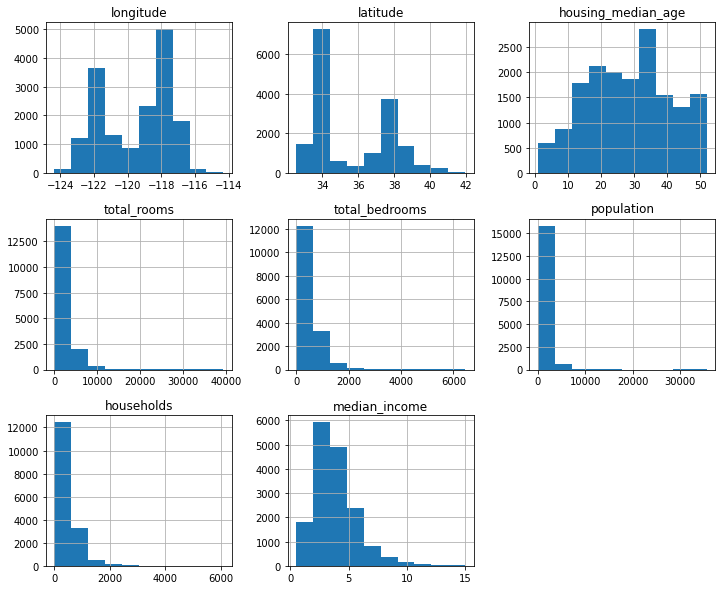

In [60]:
x.hist(figsize = (12,10))
plt.show()

In [49]:
corr_mat = x.corr()

<AxesSubplot:>

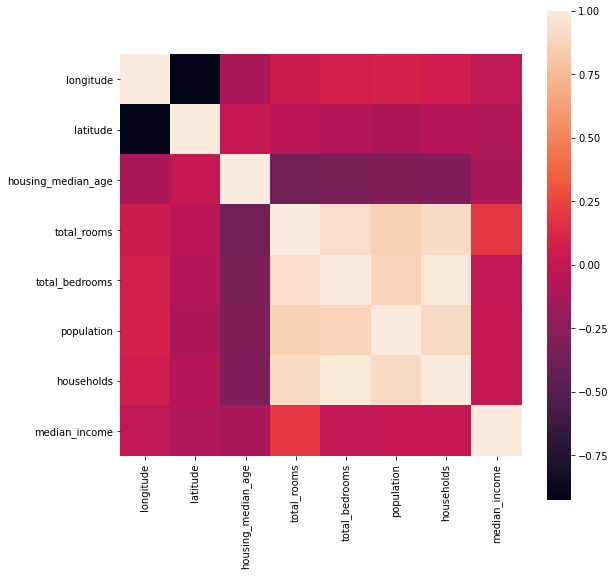

In [53]:
fig = plt.figure(figsize = (9,9))
sb.heatmap(corr_mat,vmax = 1, square = True)

In [54]:
regressor = Regressor(x)

In [55]:
regressor.X.shape

torch.Size([16512, 12])

In [56]:
regressor.X

tensor([[ 0.9731, -0.6972, -0.6080,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.0928, -0.7675,  1.8495,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.6087, -0.8097,  0.5811,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.5737, -0.7956,  0.0262,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.2376, -1.4048,  0.5811,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.2526, -1.3580,  0.5018,  ...,  0.0000,  0.0000,  0.0000]])

In [14]:
regressor.X[0,:]

tensor([ 1.0000,  0.9731, -0.6972, -0.6080,  2.6277,  2.0031,  2.5134,  2.1826,
         0.3074])

longitude
Example of values: [-124.35 -124.3  -124.27 -124.26 -124.25 -124.23 -124.22 -124.21 -124.19
 -124.18]
Min: -124.35 - Max: -114.31 - Median: -119.68783353733168
Nr of unique values: 817 -  Max occurence: 138 - Min occurence: 1
Number of na: 0


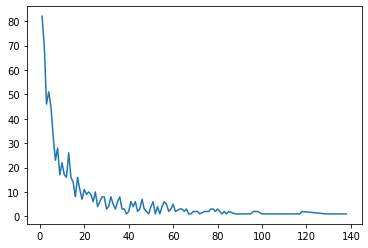


latitude
Example of values: [32.54 32.55 32.56 32.57 32.58 32.59 32.6  32.61 32.62 32.63]
Min: 32.54 - Max: 41.95 - Median: 36.96072705601907
Nr of unique values: 839 -  Max occurence: 200 - Min occurence: 1
Number of na: 0


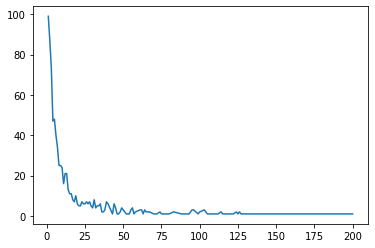


housing_median_age
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 52.0 - Median: 26.5
Nr of unique values: 52 -  Max occurence: 1021 - Min occurence: 4
Number of na: 0


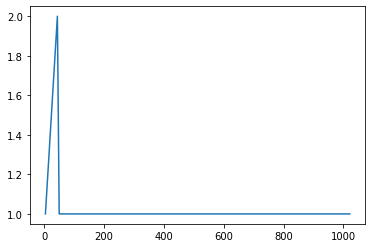


total_rooms
Example of values: [ 2.  6.  8. 11. 12. 15. 18. 19. 20. 21.]
Min: 2.0 - Max: 39320.0 - Median: 3681.524199417758
Nr of unique values: 5496 -  Max occurence: 15 - Min occurence: 1
Number of na: 0


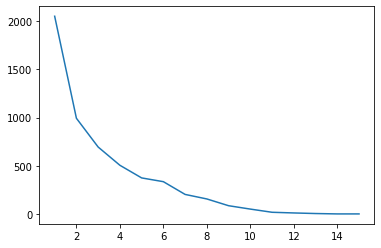


total_bedrooms
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 6445.0 - Median: nan
Nr of unique values: 1995 -  Max occurence: 48 - Min occurence: 1
Number of na: 168


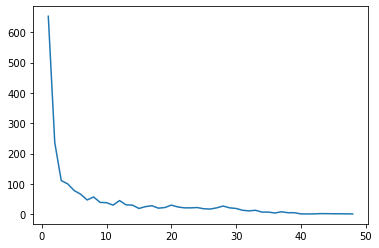


population
Example of values: [ 3.  5.  6.  8.  9. 11. 13. 14. 15. 17.]
Min: 3.0 - Max: 35682.0 - Median: 2238.1895604395604
Nr of unique values: 3640 -  Max occurence: 23 - Min occurence: 1
Number of na: 0


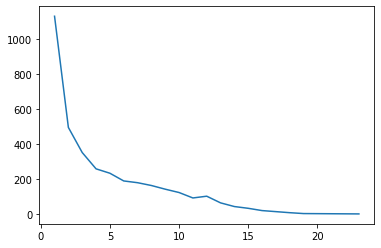


households
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 6082.0 - Median: 1001.4146767617938
Nr of unique values: 1717 -  Max occurence: 49 - Min occurence: 1
Number of na: 0


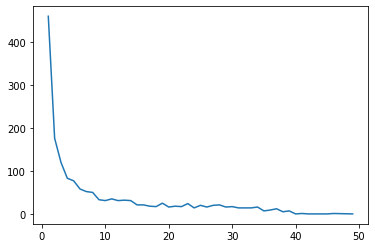


median_income
Example of values: [0.4999 0.536  0.5495 0.6433 0.6825 0.6991 0.7007 0.7025 0.7069 0.7075]
Min: 0.4999 - Max: 15.0001 - Median: 4.10347061351376
Nr of unique values: 10937 -  Max occurence: 41 - Min occurence: 1
Number of na: 0


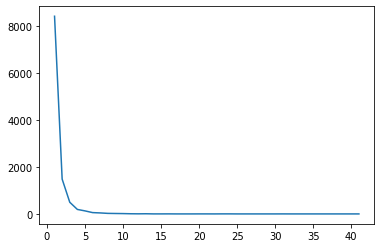


ocean_proximity
Example of values: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [24]:
for column in data.columns:
    print(column)
    unique, count = np.unique(data[column],return_counts = True)
    print("Example of values: {}".format(unique[:10]))
    print("Min: {} - Max: {} - Median: {}".format(min(unique),max(unique),np.mean(unique)))
    print("Nr of unique values: {} -  Max occurence: {} - Min occurence: {}".format(len(unique),max(count),min(count)) )
    print("Number of na: {}".format(data[column].isna().sum()))
    occurences,countcount = np.unique(count, return_counts= True)
    plt.plot(occurences,countcount)
    plt.show()
    print()